In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import html
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
post_df = pd.read_csv('ssu_posts.csv', index_col=0)

/home/aaron/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
post_df.head()

,handle,text,time_stamp
0,Hero,Final Test,2001-11-01 00:00:01
1,Asuka,^_^,2001-11-01 00:00:02
2,Cecil,Hey everyone!,2001-11-01 00:00:03
3,No Name 1029,Hey Cecil.,2001-11-01 00:00:04
4,Cecil,What&#39;s up?,2001-11-01 00:00:05


In [5]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1711195 entries, 0 to 1711192
Data columns (total 3 columns):
handle        object
text          object
time_stamp    object
dtypes: object(3)
memory usage: 52.2+ MB


In [6]:
post_df.text.fillna('', inplace=True)

In [7]:
post_df['text_parsed'] = post_df['text'].apply(html.unescape)

In [8]:
posts = post_df.text_parsed.values

In [9]:
img_mask = post_df.text_parsed.str.contains('<img')

In [10]:
img_mask.sum()

361257

In [11]:
img_mask.sum()/len(post_df)

0.21111387071607854

In [42]:
EMOTICON_MAP = {
    '^_^': '[animesmile]',
    '~_^': '[animewink]',
    '^_~': '[animewink]',
    '^_-': '[animewink]',
    '-_^': '[animewink]',
    ':p': '[tongue]',
    ':P': '[tongue]',
    ';p': '[tonguewink]',
    ';P': '[tonguewink]',
    ':)': '[smile]',
    ';)': '[wink]',
    ':-)': '[smile]',
}

In [43]:
url_match = re.compile('https?:\/\/.*[\r\n]*')

In [46]:
def parse_chat_posts(post, emoticon_map=EMOTICON_MAP, url_match=None):
    post_soup = BeautifulSoup(post, "lxml")
    for img_tag in post_soup.findAll('img'):
        alt = img_tag.get('alt')
        if alt is not None:
            img_tag.replace_with(alt.lower())
            continue

        src = img_tag.get('src')
        if src is None:
            img_tag.replace_with('[unknown]')
            continue
        file_name = src.split('/')[-1]
        file_name = file_name.split('.')[0]
        img_tag.replace_with('[{}]'.format(file_name.lower()))
    
    bs_parsed_text = post_soup.text
    
    for emoticon, text in emoticon_map.items():
        bs_parsed_text = bs_parsed_text.replace(emoticon, text)
    
    if url_match is not None:
        bs_parsed_text = url_match.sub('[url]', bs_parsed_text)

    return bs_parsed_text

In [49]:
post_df['text_parsed_bs'] = post_df.text_parsed.apply(parse_chat_posts)

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.40.106" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.141.109.67" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/schedulefornextyear2.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.dumbwarnings.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/cgi-bin/ikonboard//ikonboard.cgi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.dumbwarnings.com/picturedocs/signs_wet.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.animejump.com/images/omake/digimon/digimon3.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.perl.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.perldoc.com/perl5.6/pod/perlfunc.html#Perl-Functions-by-Category" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like re

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bucketmouse.net/nintendo/ssb-small.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.tzeldar.com/images/tzeldar5.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.lionhead.co.uk/unshocked/bw/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docum

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/uysatu/oo.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ffwa.org/forums/showthread.php?s=&threadid=3321" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ryudesigns.hypermart.net/Chaccone.mid" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to ge

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/herodp.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://zbattle.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/changes.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed t

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/testsearch.shtml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://news.cnet.com/news/0-1003-200-8244349.html?tag=mn_hd" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.washingtonpost.com/wp-dyn/articles/A7050-2001Dec20.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.modularpeople.com/avalanches/micro/v2/rm/frontier.rpm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.141.109.67/smbssoutro.wmv" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://entertainment.msn.com/news/eonline/010302_nsync.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client lik

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.toiletduk.net/multimedia/flash/exuberance.swf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.cdjapan.co.jp/detailview.html?KEY=PCBC-90001" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/y2003bug.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sporkspace.org/antichrist/detect.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/abe.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.symantec.com/avcenter/venc/data/fix.vbs.loveletter.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.animemusicvideos.org/banners/amvbannerlemons.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ceruleanstudios.com/skins.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/nimda/ffbadmin.cgi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.145.23/friends/melissabriangnomie.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/images/everywhore.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpgamer.com/games/ff/ff10/screens/ffx4.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like request

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://maniacaladvantage.keenspace.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.dejap.com/so.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jedi_chocobo.tripod.com/hapenis.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, an

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.blambot.com/menu.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jedi_chocobo.tripod.com/endrun.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://twentiethcenturycow.tripod.com/sounds/lordch2.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.orbitz.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://mediaviewer.ign.com/ignMediaPage.jsp?article_id=97665&channel_id=74&adtag=network%3Dign%26site%3Dcubeviewer%26pagetype%3Darticle&page_title=Spaceworld+2001%3A+First-Ever+Video+and+Screens%3A+Zelda+and+Mario" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/angryvivi.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.videocds.com/dvd/cartoon/dvd_sprite_between_two_worlds.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.animeondvd.com/reviews/region1/q-t/sprite.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://members.aol.com/Icehouse30/CyberSex.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.jaybill.com/~jaybill/article.php?articleID=49" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://brie.library.cmu.edu/reserves2/hlphkotovsky79.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.huppi.com/kangaroo/L-harvardberkeley.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://news.com.com/2100-1040-854906.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://starmen.net/mother2/desktop/skins/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the do

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.surfingtheapocalypse.com/haunted_painting.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.oneminuteleft.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://community.webshots.com/storage/1/v5/7/93/47/33179347epGBbE_ph.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client lik

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://story.news.yahoo.com/news?tmpl=story&u=/nm/20020325/od_nm/couple_dc_3&cid=573" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.connpost.com/Stories/0,1002,3750%7E480040,00.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.securityarms.com/20010315/galleryfiles/0600/655.htm" looks like a URL. Beautiful Soup is not an HTTP c

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://zdnet.com.com/2100-1105-873416.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/april2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/invert.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL,

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/moonett.zip" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffcollection.hypermart.net/Chobits" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/Something2.mid" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document be

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Scan.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Scan2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Scan3.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and fe

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://winabmw.midway.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://agtp.romhack.net/lal.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.encodethis.net/BVIM/bvim_reign_of_fire_trailer_1500.mov" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document beh

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.everything2.com/index.pl?node=Kaboom!" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.starbaseone.com/index.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.viciousgrin.com/images/jthm.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.puissance-nintendo.com/cgi-bin/news/viewnews.cgi?category=3&id=1020261115" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.icecream.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.solfire.com/flash/LittleRedMonkee.swf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.btinternet.com/~david.st/b3ta/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://myweb.tiscali.co.uk/dmetcalfe/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jedi_chocobo.tripod.com/saddamandgamera.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the documen

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/end03.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/redleader/e3021.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.nintendojo.com/e3/pre/view_item.php?1022002869" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/youstupidbitch.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/redleader/rieszbw.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/redleader/angelan2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/vavkill.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/vav2.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/vav3.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and f

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.hitmenow.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/DestructionDragon.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/ImmaculateDragon.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the d

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.live365.com/stations/134164" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://story.news.yahoo.com/news?tmpl=story&ncid=578&e=4&cid=578&u=/nm/20020621/ts_nm/space_asteroid_dc_1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ve3d.com/comments.taf?postid=29002'" looks like a URL. Beautiful Soup is not an HTTP client. You should

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.digikym.com/scripts/archives/00000764.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.digikym.com/scripts/archives/00000769.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.digikym.com/scripts/archives/00000767.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://zanyvg.overclocked.org/prowrestling/winner.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.afterdawn.com/general/disclaimers/decss_disclaimer.cfm?software_id=359" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://linda.mine.nu/%7Emtt/MTT-Kwasek-Cucumber2.mpg" looks like a URL. Beautiful Soup is not an HTTP client. You should pr

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/NieA_7Closing.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.websponsors.com/leads/2927/468.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://eternalvoid.hypermart.net/screenshots/mightyblow.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.nbc4.tv/news/1741010/detail.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.deanliou.com/WinRG/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://english.pravda.ru/main/2002/10/25/38643.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document be

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.vgmusic.com/music/console/nintendo/snes/CT1000ad.mid" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.saikano.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s2.cgi.gamefaqs.com/boards/genmessage.asp?board=239&topic=4914597&page=0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP cli

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/output.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/tempselector/index.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/lego.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document be

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/Tokyo/Palace/6259/mew.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darkroses.soliloquies.net/wonderland.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/Tokyo/Palace/6259/puff2.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requ

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.divx-digest.com/software/nimo_pack.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://headlines.yahoo.co.jp/hl?a=20021126-00000336-reu-bus_all" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gameforms.com/news/?615" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://cmf.t4c.free.fr/t4c/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.tripler6.com/spr.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.145.23/52.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/PHB-DMG-MM.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://216.200.201.214/index.pl?lastnode_id=1140332&node_id=605626" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://wolf.cyberstreet.net/index.php?ref=291752" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like r

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bash.org/?5598" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Spells.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/zelda1m.wmv" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed tha

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.math.wisc.edu/~kach/CSF.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/samus1.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/redleader/acgirl.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behi

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.funnyjunk.com/pages/many_faces_of_dubyuh.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bushorchimp.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.funnyjunk.com/pages/squirrelbeer.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the documen

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/sheet.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Equipment.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://216.201.200.214/index.pl?node=Ralph" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docu

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://dictionary.reference.com/search?q=Bailey" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s2.cgi.gamefaqs.com/boards/genmessage.asp?board=7939&topic=4582481&page=0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.classicgaming.com/mdb/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://slashdot.org/article.pl?sid=02/12/27/1748252&mode=thread&tid=127" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpgamer.com/games/suiko/suik3/art/gs3-026.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.oekakicentral.com/tenniscourt/index.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably us

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://216.200.201.214/index.pl?lastnode_id=1331439&node_id=1331438" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.csis.org/burke/hd/reports/Buffy012902.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.eviloverlord.com/lists/overlord.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP c

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/eb" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gameforms.com/news/?675" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.comingsoon.net/cgi-bin/archive/fullnews.cgi?newsid1043217080,46536," looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get th

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.xupiter.com/uninstall" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://download.com.com/3000-2144-10185294.html?tag=tid" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.iamfuckingstupid.com/index.pl?node_id=107878" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to g

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ffrserver2.com/indexwrap.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.spirits.ca/sheet/ff6/tina.zip" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://pictures.gundamw.net/g/epthirty13.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document be

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.145.23/ring.wma" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/HappyLaughy.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.145.23/steven.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www03.quizyourfriends.com/yourquiz.php?quizname=030302143753-All~p20About~p20Cecil~p2C~p20Part~p202" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/LaChuckle.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.droogz.co.uk/movies/SE7EN/08gun.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You shou

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://216.136.200.194/auction/Mar/2003391172428775927703.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://members.lycos.co.uk/lesalius/picture.PNG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/David%20Benoit%20-%20Fuzzy%20Logic.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/zabet.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.humanmetrics.com/cgi-win/JTypes2.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/art/sevenpainting-sm.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like request

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://home.att.net/~albanes/index.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.chrisstorer.com/cupholder.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://kor.elogical.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://aitrw.keenspace.com/extra/art/images/cbtlfull.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=2003-03-24" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.145.23/guitar1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to ge

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.side7.com/cgi-bin/S7SDB/DisplayImg.pl?INO=257327" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/DrPepperCollage.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/abstractgallery_y/yua/yua_02_1024.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gamespot.com/gba/rpg/mother/news_6025116.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.student.smsu.edu/s/san232s/hardfunnypics/attentionwhorestory.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.219.200/americanwomanintro.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.adventurers-comic.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Japanese/basics/tg5f4/hero.cgi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Smashy.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the d

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/americanpie.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.win.tue.nl/~kroisos/ragnarok/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/aaronpainting.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the doc

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.paragon-sci.com/htm/p-vi-cannonroutine.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.side7.com/cgi-bin/S7SDB/DisplayImg.pl?INO=260009" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=2003-05-02&res=l" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an H

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.jazzmess.com/merch/cds/dvd/blue_live.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.secretservicetest.co.uk/index.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Japanese/basics/tg5f4/faces/sleep.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.clanbob.net/modules.php?name=Archives&action=view_strip&strip_num=231" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.airside.co.uk/business/movingimage/ljducksvid01.shtml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/exam.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/AD&D%203E%20-%20Tome%20&%20Blood%20-%20A%20Guidebook%20to%20Wizards%20and%20Sorcerors.pdf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://eternalvoid.hypermart.net/LakeUri.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/RO%20-%20Under%20the%20Ground.mp3" looks like a URL. Beautiful Soup is n

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://lord_blot.tripod.com/turinbanderock.doc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/dnd/stats" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/vavalion_2000/narok.rtf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/NameThatTune.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/LaLaLa.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/RO/screenLoki028.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document be

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/KIKAIDER_OP-gemini.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jp.shockwave.com/games/puzzles/zookeeper/zookeeper.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/FinalBoss.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requ

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/photojournal/6.17.03" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/redleader/canopus.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sixsixfive.com/FNARTES/anubis_front.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/puke.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ufocatcher.net/hatsukoiplush/agentsmith.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.badastronomy.com/bad/tv/foxapollo.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.emode.com/emode/tests/cat_files.jsp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/Wheaties5.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/Wheaties1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the documen

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffwa.org/forums/showthread.php?s=&threadid=37185&pagenumber=1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffwa.org/forums/showthread.php?s=&postid=749451#post749451" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffwa.org/forums/showthread.php?s=&postid=749481#post749481" looks like a URL. Beautiful Soup is not an HTTP client. Y

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s2.cgi.gamefaqs.com/boards/genmessage.asp?board=8&topic=8854810" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Fireworks.AVI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://miyokiyo2002.tripod.com/2002/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests t

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/LavosAttacks.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sixsixfive.com/602.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sixsixfive.com/about.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behin

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/Boy.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/pointyhat.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/Kyte.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind t

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s3.cgi.gamefaqs.com/boards/genmessage.asp?board=8&topic=8929646" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s3.cgi.gamefaqs.com/boards/genmessage.asp?board=8&topic=8943046" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.seanbaby.com/superfriends/wonderwoman3.htm" looks like a URL. Beautiful Soup is not an HTTP client. You sh

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/neue.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/god.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://dyuminasu.tripod.com/cgi-bin/MntCmo.pl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/elephant.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Whyyy.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.everything2.com/index.pl?node_id=1319209" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the do

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s3.cgi.gamefaqs.com/boards/genmessage.asp?board=8&topic=9050236" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.theonionavclub.com/features.php?feature_id=44" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://nfg.2y.net/games/pasogo/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client lik

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/2mekatana22jul03.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/3mekatana22jul03.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/mekatana22jun03.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jr_postcards_wi.tripod.com/wi51.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://web.archive.org/web/20020707040239/http://www.ssuniverse.com/FFB/oldlog.cgi?Date=Jun-18-02" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/OogieDoogie.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/emergencycock.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.unitedmedia.com/comics/dilbert/archive/index.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.catbirdseat.org/catbirdseat/bingo.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clie

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/EveGroup.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://risalia.tripod.com/illiademo.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Aaron/Madison/libmall01.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to ge

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sixsixfive.com/614.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://quizilla.com/users/Cycophant/quizzes/Which%20Country%20of%20the%20World%20are%20You%3F/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=8.29.02" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://archive.dumpshock.com/CLUE/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/braincleaner.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/VIS.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docu

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpgamer.com/games/other/ps2/md/md.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gameforms.com/games/ps2/disgaea/preview.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://imbolc.ucc.ie/~pflynn/recipes/magical_grapefruit.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clie

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.side7.com/cgi-bin/S7SDB/Display.pl?act=gallery&aid=10531" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.actsofgord.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/truth.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Blaze.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://north.usd259.org/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/deathschedule.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ntv.co.jp/channel/kasoh/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.side7.com/cgi-bin/S7SDB/Display.pl?act=image&iid=275591" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/buster.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.cnn.com/2003/WORLD/meast/09/10/saudi.barbie.ap/index.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ocremix.org/detailmix.php?mixid=OCR00241" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://yowusa.com/Archive/Sep2003/Jupiter_attack/jupiter_attack.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should pr

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Archive/oldlog.cgi?Date=Apr-29-03&jump=72#72" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/tbyeyes3b.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=9.16.03" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP cl

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/soulds/SSUmuffin.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/ilsynsilo.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/ilsyn-big.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bulkvend.com/new_pa13.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.hildebrand-farms.com/runts.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.pojo.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://shackle.pirate-king.net/five/ep5-260.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://shackle.pirate-king.net/six/ep6-161.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://shackle.pirate-king.net/six/ep6-162.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://videoclipstream.com/akamai/h-l/honda/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.addictinggames.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpgamer.com/games/tales/tos/art/tos021.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/RK.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Boston_Pops_-_When_Johnny_Comes_Marching_Home.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://lord_blot.tripod.com/BP_-_WJCMH.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://support.microsoft.com/default.aspx?scid=kb;en-us;311108" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://support.microsoft.com/default.aspx?scid=kb;en-us;169501" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gamebooks.org/gallery/eq1-13.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Nadia/PepeAv.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Nadia/PepeAv1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sixsixfive.com/429.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get th

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/ActRaiser2.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://sheep.hk.st/wallpaper/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/twirl.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behin

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.oz.net/~carebear/Poppleland.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=1999-03-03&res=l" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.crunkgames.com/profiles/gb/mariospecial/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like re

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www5a.biglobe.ne.jp/~amta/g_tya01h.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www5a.biglobe.ne.jp/~amta/g_rba2.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://abbie.blogspot.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the U

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://homepage1.nifty.com/marumu/CG1997/MRTAI00.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.hobowars.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://homepage1.nifty.com/marumu/CG1998/MRREI16.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/vavalion_2000/desktop.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ebaumsworld.com/media/index.php?e=snakeattack.wmv" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.homestarrunner.com/luau2.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like reque

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://mschile.brunchma.com/crapola/fruitfliessign.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://kom.net/~eli/stuff/churchsign-jcvh.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://store.yahoo.com/brandsonsale-store/child-pimp-suits.html#products" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an H

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://images.amazon.com/images/P/B00006JU84.01.LZZZZZZZ.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=FFXI&start=72" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.emode.com/emode/tests/evil.jsp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.thebricktestament.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www2.ktplan.jp/~sukeakurou/gal/ladyjoker.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www2.ktplan.jp/~sukeakurou/gal/jyuu.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docum

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Shining_Collection.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpg.net/news+reviews/columns/acksep97.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.webrpg.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document beh

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://students.washington.edu/edpham/SMB.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://download.com.com/3000-2194-10205771.html?tag=lst-0-1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.1up.com/article2/0,4364,1398345,00.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like re

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/katy.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.simplyvintage.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/Cassidy.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, a

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ecchi-attack.com/cgi-bin/content2/viewnews.cgi?id=EpZpulVkZlFeQEZmUf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.crunkgames.com/therest/ff7advent/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://engrish.com/image/engrish/wintergnats.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an H

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.netlaputa.ne.jp/~piko/woll/take06-hp.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.netlaputa.ne.jp/~piko/yoru/binta02-2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.h-mizuki.com/CG/IMG/MIZ031.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/QuantumGhosts.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.candystand.com/games/cs_shock_csmp8.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.side7.com/cgi-bin/S7SDB/Display.pl?act=image&iid=284333" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://arc-station.net/takumi/image/IRC/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://video.barnesandnoble.com/search/product.asp?userid=52MIX3W08L&sourceid=00398880827015872163&bfdate=12%2D11%2D2003+20%3A15%3A03&EAN=669198221699&FRM=0&itm=9" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Shadow.wav" looks like a URL.

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.washingtondispatch.com/article_7365.shtml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.yourethemannowdog.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.homestarrunner.com/sbemail92.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www-unix.oit.umass.edu/~thoureau/japanese.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/SSUCon/Group2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.seankreynolds.com/rpgfiles/misc/theoryaboutpeasants.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clie

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bifrost.com.au/hosting/gnomes/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.chessbase.com/newsdetail.asp?newsid=1348" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/twelve.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the documen

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://detonator.pyoko.org/pics/blonde3.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://detonator.pyoko.org/pics/blonde1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://detonator.pyoko.org/pics/blonde2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=12.30.03" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ceruleanstudios.com/downloads/downloads.php?d_type=&SortBy=All" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.animeondvd.com/interactive/contests/2003/instacontest.php" looks like a URL. Beautiful Soup is not an HTTP client. You shoul

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.vesta.dti.ne.jp/~dooy/sukebu/cgdata/cgdata01.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.vesta.dti.ne.jp/~dooy/sukebu/cgdata/cgdata02.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/demoprofile.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rar.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.linkYOU.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.macktruckintheface.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful S

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffxi.allakhazam.com/db/jobs.html?fjob=1&mid=1073336147266851235&num=4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://maddox.xmission.com/c.cgi?u=real_men" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/LadiesMan.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.219.58/Thunderstruck.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://24.150.219.58/newamp1.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://lord_blot.tripod.com/Gollum.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, an

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://suzuka.milkcafe.to/gallery/2000/suzu32.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://suisen.sakura.ne.jp/~boltking/gallery_sr13.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Red/bmg.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like reques

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.brandonbird.com/lno_color.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.yukihime.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/chat/faces/slice.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.gamespot.com/ps2/puzzle/taikonotatsujin/news_6086919.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/AzAli.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://darrow.hypermart.net/AzDead.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/debug/emoticons.pl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/chat/emoticons.pl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.netlaputa.ne.jp/~l20mogue/reimeido.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.e-zelda.com/index.php?id=zdwnlds/sheets.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.lilgnr.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://gallery.suikonline.net/details.php?image_id=105&mode=search&sessionid=5d264e2277203ba8c48720f495f41c11" looks like a URL. Beautiful Soup is not an HTTP client. You should pro

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.yamiya.jp/das/cg/adult/tom_127.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.wam.umd.edu/~rsgerard/general.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.classicgaming.com/mdb/m1/endings.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get t

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/bj.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.seacoastonline.com/news/02122004/news/75502.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://members.jcom.home.ne.jp/mai.h/ill/aer08.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like request

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.1up.com/article2/0,4364,1530750,00.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://red.sakura.ne.jp/~soma/pic/207.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://red.sakura.ne.jp/~soma/pic/210.png" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docu

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/EvilVavYawn.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://park17.wakwak.com/~cage/graphc/110.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/sockslife.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bazooie.com/mp3/bazooie-gellie%20frisbee.mp3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Red%20Leader/devilgundam.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ffcollection.hypermart.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requ

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.math.umd.edu/grades/MATH405.0101.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://poolofechoes.no-ip.com/katecomic.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ironmouse.za.org/dragon/taki/011/024901.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to g

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/Thing.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.1up.com/article2/0,4364,1487822,00.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/Purr.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/genital.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/exposeyourself.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.miniclip.com/heli2.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Cloak.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/passing-gas.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.myimgs.com/data/walkingcarpet/Fark/0322040319.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clien

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.thesun.co.uk/article/0,,2-2004141090,00.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ocf.berkeley.edu/~derekyu/pr0n/images/chrono.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ocf.berkeley.edu/~derekyu/pr0n/images/ssbm5.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.imdb.com/bottom_100_films" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.weebls-stuff.com/toons/29/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.straightdope.com/classics/a1_033" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rpgamer.com/games/harvest/hmawl/screens/hmawl025.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.thefeature.com/article?articleid=100501&ref=-1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://rudora-id.hp.infoseek.co.jp/haevest/20/286p.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.homestarrunner.com/underconstruction.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/ffxi/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.convertit.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behin

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://mirrored.flabber.nl/winnoise/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Ads.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://takureihp.hp.infoseek.co.jp/Princess-azumanga.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to ge

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.toastyfrog.com/images/indexart04/040417-myartsucks.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://elfonlyinn.keenspace.com/d/20021218.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://elfonlyinn.keenspace.com/d/20021220.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/electric-notice.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.yukihime.com/photos/040419/pigletpants.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Armadillo/Vein.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clien

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://frequencymusic.cjb.net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Blonde.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Haaair.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docu

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Dark_Paladin/Recital.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/pictures/Kvan/exhibita.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/pictures/Kvan/exhibitb.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=2004-04-30" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://news.bbc.co.uk/1/hi/technology/3647437.stm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://art.slimemansion.com/copyright/nintendo/009peach.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://dictionary.reference.com/search?q=defenestrate" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/Elan.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rinkworks.com/forest/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.everything2.com/index.pl?node_id=918058" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.kingdomofloathing.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.zeldalegends.net/e3/zl_e3_14.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document b

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Armadillo/orderofbow.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/beware-baby.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/we-head.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/praystation.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=2004-05-21" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://finance.messages.yahoo.com/bbs?.mm=FN&action=m&board=7077759&tid=lea&sid=7077759&mid=5558" looks like a URL. Beautiful Soup is not an HTTP client

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.cockeyed.com/inside/salsa/salsa.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.powershot.com/powershot2/customer/WIA_ME_620.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.powershot.com/powershot2/customer/WIA_ME_610.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/SSUCon/2004/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.qwantz.com/20030526.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.video-fenky.com/features/dentaku/dentaku.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get th

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.etam.com/is-bin/INTERSHOP.enfinity/eCS/Store/en/-/ITL/Storefront-Start1?CurrentCurrency=ITL&CurrentCountry=en" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.etam.com/is-bin/INTERSHOP.enfinity/eCS/Store/en/-/ITL/BrowseProduct-Start;sid=bjQUlZOqUIwUi9NrWpnAFK34jcXc_Qy0uX0=?ProductID=ZI7CddwXWtcAAAD7yFs9TlP5&CatalogCategoryID=LB13&FirstTime=1%2e00" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.penny-arcade.com/view.php3?date=2004-06-07" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jobsearch.monster.com/getjob.asp?JobID=21938265&AVSDM=2004%2D04%2D29+10%3A56%3A32&Logo=1&col=dltci&cy=US&brd=1%2C1862%2C1863&lid=355&fn=&q=%22IT+support%22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://parentingteens.about.com/od/harrypo

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/miscellaneous/Armadillo/dnd/Drella.doc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://elfonlyinn.keenspace.com/d/20040607.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.qwantz.com/20030915.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requ

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://quizilla.com/users/humblegenius/quizzes/How%20fast%20would%20you%20die%20in%20a%20cheesy%20zombie%20flick%3F/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.lynnart.net/3d/objects/arms/blunderbuss.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/miscellaneous/Janus/whatisiiiiit.mp3" looks like a URL. 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.nextel.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.chocobos.com/fmvs.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/pictures/Hero/uglycc.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, a

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.bad-candy.com/candies/tamarind/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://blank.nothing.ca/archive/00000381.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/pictures/Janus/BigPen.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to g

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Carl/party.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Carl/someofssu.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/ffb/stats/Emilynn.ruse" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/gabecd.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/gabecd.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.a-no-ne.net/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/FFB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.fredericks.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.jkrowling.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.adequacy.org/public/stories/2001.12.2.42056.2147.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.knightsedge.com/swords/reverse-blade-sword-2044g.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.knightsedge.com/index.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP cli

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://nocircles.com/index.php?boyhave=flash" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.wildlifedamagecontrol.com/animalrights/leastharm.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Vav/whoisthat.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.blizzard.com/wow/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.blizzard.com/wow/townhall/tradeskills.shtml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://illustmaker.abi-station.com/index_en.shtml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docu

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.theonion.com/news/index.php?issue=4028&n=1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.illegal-art.org" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Aaron/maple.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the docume

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=7.04.04" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/valentinespresentsm.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.megatokyo.com/index.php?strip_id=579" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like req

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Owl.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/dnd/DungeonMap.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/Profiles/SSUProfiles.cgi?ShowProfile=The%20Man" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP cli

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.newgrounds.com/portal/view/183276" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Kitties.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://216.64.206.140:7000" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behi

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.cocoebiz.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sasugabooks.com/product_info.php?products_id=18072" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://complete.gamingfm.com/requests/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behi

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://complete.gamingfm.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.milkandcookies.com/links/17611/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.endofworld.net/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.fiu.edu/~jgarci11/eventsmain.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://img.photobucket.com/albums/v457/pearljamfan/bill.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Aaron/schfall04.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client lik

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://bluelaguna.net/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.coasttocoastam.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ipgweb.cce.hp.com/service_warranty/html/total_care.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the U

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.randofu.com/viewdate.cgi?date=8.27.04" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.strangecandy.net/d/20040427.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Cecil/hair2.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to ge

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://archive.gamespy.com/e32003/screens/ps2/star%20ocean/cliff_illusts.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/Hitsujichan.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/BalloonHat.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You sho

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.projectgod.com/TripleX.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://thor.prohosting.com/laguana/Froggerpong.swf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://flashweb.hangame.co.jp/asp/flashgame.asp?gameid=bbpanda" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like reque

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/interactive/guest.cgi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellanous/Janus/Shoopuf.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/Shoopuf.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP cl

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://audigy.ath.cx:81/psf/compressed%20(complete%20sets)/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ctrlaltdel-online.com/?t=archives&date=2004-09-17" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/banana.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP c

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.dictionaraoke.org/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ssu2004az.web.aplus.net/dnd/Archmage.txt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://story.news.yahoo.com/news?tmpl=story&u=/nm/20040922/od_nm/people_malaysia_dc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client l

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.politopia.com/index.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://spamusement.com/view.php?id=81" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://spamusement.com/view.php?id=86" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, an

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/very-important-moss.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/6146353/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://abcnews.go.com/sections/politics/Vote2004/debate_poll_040930.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.engrish.com/image/engrish/toilet-seat-cover.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.capitaleye.org/inside.asp?ID=140" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/Faces.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requ

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.imao.us/archives/002045.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://ejectejecteject.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.imao.us/archives/002051.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and f

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Hero/longs-small.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youforgotpoland.com/hardwork.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youforgotpoland.com/video.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/cgi-bin/stfu.cgi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.xgenstudios.com/play/stickrpg/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Armadillo/Grizzle.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/6275431/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/6227619/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.whitehouse.gov/news/releases/2001/11/20011113-27.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/VoteForMe.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.scholastic.com/kids/president/game.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Carl/VoteForCarl.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.protestwarrior.com/new_signs.php?sign=42" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.protestwarrior.com/new_signs.php?sign=46" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.protestwarrior.com/new_signs.php?sign=45" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like re

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.rinkworks.com/pgames/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://m2.doubleclick.net/viewad/844751/16-stat_720x300_etest_jean_drp.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.10tv.com/Global/link.asp?L=118544&nav=LUERSD2C" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP clie

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.palestinehistory.com/image/wbank2.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ew.com/ew/report/0,6115,735850_10_0_,00.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://mofn.com/random/000_0180.JPG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get t

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/6329124/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.votenader.org/contribute/store2.php?cid=39" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.selectsmart.com/president/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.theonion.com/nib/index.php?issue=4044&nib=1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.insertcredit.com/features/beads/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.newgrounds.com/portal/view.php?id=59593" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ironicconsumer.com/toys/mr_pumpkin.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.fantasticfictionimages.co.uk/images/n5/n27550.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://zapatopi.net/afdb.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Vav/Warsong%20(Langrisser%20Hikari)%20(U)%20%5b!%5d.zip" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Armadillo/Sabra.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Armadillo/Calais.jpg" looks like a URL. Beautiful Soup is not an HTTP cli

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.sharkband.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.geocities.com/aquafwah/feakglasses.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ambientskies.tk/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed 

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Amy/sadcell.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.urbanlegends.about.com/library/bl_eye_of_god.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.imao.us/archives/002358.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like request

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/NGCollage.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/NGSuicide.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Janus/NinjaJet.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.wusatv9.com/news/news_article.aspx?storyid=35154" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.thedenverchannel.com/news/3955156/detail.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.omaha.com/index.php?u_pg=1636&u_sid=1271843" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTT

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/miscellaneous/Janus/MyVoice.wav" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.ssuniverse.com/pictures/Aaron/distractions.gif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://cgi.ebay.com/ws/eBayISAPI.dll?ViewItem&item=5538448277" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use 

In [50]:
post_df['text_parsed_bs'].head(20).values

array(['Final Test', '[animesmile]', 'Hey everyone!', 'Hey Cecil.',
       "What's up?", 'Test.', 'Theeeeeeeeere we go.',
       "Okay, it's all good now. [tongue]", 'Test.', 'Gooooody.',
       'Hmmm....', 'Testing again.', 'Pretty much my last test.',
       "Everything's satisfactory. Transition back to this chat complete. [animesmile]",
       'BBL, in a few hours.', 'yay [animesmile]', 'LOL@Picture Bug',
       'Test without picture', 'with pics', 'again'], dtype=object)

In [59]:
post_df.handle.fillna('', inplace=True)

In [63]:
post_df = post_df[~post_df.handle.str.contains('Random Quote')]

In [65]:
post_df.to_csv('log_bs_parsed.csv', index=False)

In [3]:
post_df = pd.read_csv('log_bs_parsed.csv')

In [7]:
len(post_df.handle.unique())

2545

In [13]:
post_df.loc[post_df.handle.isnull(), 'handle'] = 'Null Handle'

In [14]:
post_df['handle'] = post_df.handle.apply(html.unescape)

In [47]:
post_df['handle'] = post_df.handle.apply(parse_chat_posts)

/home/aaron/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://s93722309.onlinehome.us/chat/face" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [51]:
post_df.handle.value_counts().describe()

count      2526.000000
mean        674.600950
std        9116.004779
min           1.000000
25%           1.000000
50%           4.000000
75%          26.000000
max      287940.000000
Name: handle, dtype: float64

In [57]:
post_df.shift(periods=-2).head(), post_df.head()

(         handle                  text           time_stamp  \
 0         Cecil         Hey everyone!  2001-11-01 00:00:03   
 1  No Name 1029            Hey Cecil.  2001-11-01 00:00:04   
 2         Cecil        What&#39;s up?  2001-11-01 00:00:05   
 3         Janus                 Test.  2001-11-01 00:00:06   
 4         Janus  Theeeeeeeeere we go.  2001-11-01 00:00:07   
 
             text_parsed        text_parsed_bs  
 0         Hey everyone!         Hey everyone!  
 1            Hey Cecil.            Hey Cecil.  
 2            What's up?            What's up?  
 3                 Test.                 Test.  
 4  Theeeeeeeeere we go.  Theeeeeeeeere we go.  ,
          handle            text           time_stamp    text_parsed  \
 0          Hero      Final Test  2001-11-01 00:00:01     Final Test   
 1         Asuka             ^_^  2001-11-01 00:00:02            ^_^   
 2         Cecil   Hey everyone!  2001-11-01 00:00:03  Hey everyone!   
 3  No Name 1029      Hey Cecil.  200

In [110]:
handle_df = post_df.loc[:, ['time_stamp', 'handle', 'text_parsed_bs']].rename(columns={'text_parsed_bs': 'text'})

In [97]:
ref_nums = [-2, -1, 1, 2]

In [98]:
combined_posts = handle_df.time_stamp + ' ' + handle_df.handle + ': ' + handle_df.text

In [111]:
for ref_num in ref_nums:
    if ref_num > 0:
        ref_str = 'back'
        
    else:
        ref_str = 'forward'
        
    handle_df['{}_{}_post'.format(ref_str, -1*ref_num)] = combined_posts.shift(periods=ref_num)

In [112]:
handle_df['guess_who'] = ''

In [113]:
handle_df = handle_df.loc[:, ['time_stamp', 'handle', 'back_-2_post', 
                              'back_-1_post', 'text', 'forward_1_post', 'forward_2_post', 'guess_who']]

In [114]:
handle_df.head()

,time_stamp,handle,back_-2_post,back_-1_post,text,forward_1_post,forward_2_post,guess_who
0,2001-11-01 00:00:01,Hero,NaN,NaN,Final Test,2001-11-01 00:00:02 Asuka: [animesmile],2001-11-01 00:00:03 Cecil: Hey everyone!,
1,2001-11-01 00:00:02,Asuka,NaN,2001-11-01 00:00:01 Hero: Final Test,[animesmile],2001-11-01 00:00:03 Cecil: Hey everyone!,2001-11-01 00:00:04 No Name 1029: Hey Cecil.,
2,2001-11-01 00:00:03,Cecil,2001-11-01 00:00:01 Hero: Final Test,2001-11-01 00:00:02 Asuka: [animesmile],Hey everyone!,2001-11-01 00:00:04 No Name 1029: Hey Cecil.,2001-11-01 00:00:05 Cecil: What's up?,
3,2001-11-01 00:00:04,No Name 1029,2001-11-01 00:00:02 Asuka: [animesmile],2001-11-01 00:00:03 Cecil: Hey everyone!,Hey Cecil.,2001-11-01 00:00:05 Cecil: What's up?,2001-11-01 00:00:06 Janus: Test.,
4,2001-11-01 00:00:05,Cecil,2001-11-01 00:00:03 Cecil: Hey everyone!,2001-11-01 00:00:04 No Name 1029: Hey Cecil.,What's up?,2001-11-01 00:00:06 Janus: Test.,2001-11-01 00:00:07 Janus: Theeeeeeeeere we go.,


In [115]:
handle_df[handle_df.handle.str.startswith('Red or')].to_csv('guess_who_red_or_nadia.csv', index=False)

In [116]:
orphan_handles1 = handle_df.handle.value_counts()[handle_df.handle.value_counts() == 1].index.tolist()

In [120]:
handle_df[handle_df.handle.isin(orphan_handles1)].to_csv('guess_who_challenge1.csv', index=False)

In [121]:
handle_counts = handle_df.handle.value_counts()

In [125]:
handle_mask = (handle_counts >= 2) & (handle_counts <= 4)

In [128]:
handles_2_to_4 = handle_counts[handle_mask].index.tolist()

In [132]:
twofour_df = handle_df[handle_df.handle.isin(handles_2_to_4)].sort_values(['handle', 'time_stamp'])

In [135]:
twofour_df.to_csv('guess_who_challenge2-4.csv', index=False)

In [137]:
handle_mask = (handle_counts >= 5) & (handle_counts <= 6)

In [138]:
handles_5_to_6 = handle_counts[handle_mask].index.tolist()

In [139]:
fivesix_df = handle_df[handle_df.handle.isin(handles_5_to_6)].sort_values(['handle', 'time_stamp'])

In [143]:
fivesix_df.to_csv('guess_who_challenge5-6.csv', index=False)

In [153]:
handles_7_to_10_mask = (handle_counts >= 7) & (handle_counts <= 10)

In [164]:
handles_7_to_10 = handle_counts[handles_7_to_10_mask].index.tolist()

In [176]:
seventen_df = handle_df[handle_df.handle.isin(handles_7_to_10)].sort_values(['handle', 'time_stamp'])

In [177]:
seventen_df.to_csv('guess_who_challenge7-10.csv', index=False)

In [170]:
handles_11_to_20_mask = (handle_counts >= 11) & (handle_counts <= 20)

In [171]:
handles_11_to_20 = handle_counts[handles_11_to_20_mask].index.tolist()

In [178]:
eleventwenty_df = handle_df[handle_df.handle.isin(handles_11_to_20)].sort_values(['handle', 'time_stamp'])

In [181]:
eleventwenty_df.to_csv('guess_who_challenge11-20.csv', index=False)

In [182]:
handles_21_to_50_mask = (handle_counts >= 21) & (handle_counts <= 50)

In [184]:
handles_21_to_50 = handle_counts[handles_21_to_50_mask].index.tolist()

In [188]:
twentyonefifty_df = handle_df[handle_df.handle.isin(handles_21_to_50)].sort_values(['handle', 'time_stamp'])

In [191]:
twentyonefifty_df.to_csv('guess_who_challenge21-50.csv', index=False)

In [192]:
handles_51_to_100_mask = (handle_counts >= 51) & (handle_counts <= 100)

In [194]:
handles_51_to_100 = handle_counts[handles_51_to_100_mask].index.tolist()

In [197]:
fiftyhundred_df = handle_df[handle_df.handle.isin(handles_51_to_100)].sort_values(['handle', 'time_stamp'])

In [200]:
fiftyhundred_df.head()

,time_stamp,handle,back_-2_post,back_-1_post,text,forward_1_post,forward_2_post,guess_who
863173,2004-03-29 15:45:39,: Ranzera,2004-03-29 15:44:09 Nadia: Red: [siiiiiiiiiiii...,2004-03-29 15:44:24 Nadia: Red: Stuff.,what version are you using?,2004-03-29 15:47:03 Nadia: Red: I forgot alrea...,2004-03-29 15:48:06 : Ranzera: Oh! so you have...,
863175,2004-03-29 15:48:06,: Ranzera,2004-03-29 15:45:39 : Ranzera: what version ar...,2004-03-29 15:47:03 Nadia: Red: I forgot alrea...,Oh! so you haven't used it yet?,2004-03-29 15:48:53 Nadia: Red: Nope. And you ...,2004-03-29 15:49:44 : Ranzera: the name says a...,
863177,2004-03-29 15:49:44,: Ranzera,2004-03-29 15:48:06 : Ranzera: Oh! so you have...,2004-03-29 15:48:53 Nadia: Red: Nope. And you ...,the name says all. I would be Piki's Ex. I've ...,"2004-03-29 15:49:59 Nadia: Red: God, I feel li...",2004-03-29 15:50:08 Nadia: Ah.,
863180,2004-03-29 15:50:26,: Ranzera,"2004-03-29 15:49:59 Nadia: Red: God, I feel li...",2004-03-29 15:50:08 Nadia: Ah.,"dude, calm down. If computers are one thing, t...",2004-03-29 15:51:23 : Ranzera: I personally us...,2004-03-29 15:52:03 : Ranzera: you could also ...,
863181,2004-03-29 15:51:23,: Ranzera,2004-03-29 15:50:08 Nadia: Ah.,"2004-03-29 15:50:26 : Ranzera: dude, calm down...","I personally use a combination of Adaware, AVG...",2004-03-29 15:52:03 : Ranzera: you could also ...,2004-03-29 15:55:16 Randofu: Errr...? [feak],


In [201]:
fiftyhundred_df.to_csv('guess_who_challenge51-100.csv', index=False)

In [207]:
handles_101_to_1000_mask = (handle_counts >= 101) & (handle_counts <= 1000)

In [208]:
handles_101_to_1000 = handle_counts[handles_101_to_1000_mask].index.tolist()

In [212]:
hundredonethousand_df = handle_df[handle_df.handle.isin(handles_101_to_1000)].sort_values(['handle', 'time_stamp'])

In [215]:
hundredonethousand_df.to_csv('guess_who_challenge101-1000.csv', index=False)

In [218]:
handle_counts[handle_counts > 1000].to_csv('regulars.csv')

(0, 11)

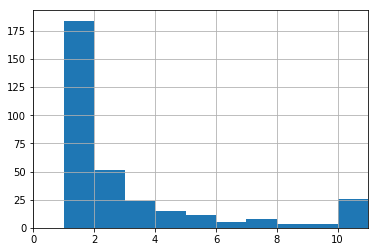

In [136]:
fig, ax = plt.subplots()
handle_counts.value_counts().hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000], ax = ax)
ax.set_xlim([0, 11])

In [50]:
post_df.handle.value_counts()[post_df.handle.value_counts() == 22]

Crono Clone #3289                22
Caveman Willis                   22
Not Piki                         22
Apathy                           22
Anti-Antifeak Killbot Killbot    22
Doogie Howser                    22
Zoomer                           22
[vav]                            22
Luke Skywalker                   22
Raud                             22
Artie                            22
Lord of Darkness                 22
Name: handle, dtype: int64

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

In [68]:
def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [69]:
count_vec = CountVectorizer(min_df=20, stop_words='english')

In [70]:
word_mat = count_vec.fit_transform(post_df['text_parsed_bs'])

In [71]:
count_vec.get_feature_names()[:10]

['00',
 '000',
 '00100000',
 '0065',
 '0080',
 '0083',
 '009',
 '00am',
 '00by',
 '00pm']

In [72]:
nmf = NMF(50)

In [73]:
nmf_mat = nmf.fit_transform(word_mat)

In [75]:
terms = np.array(count_vec.get_feature_names())
for i in range(10):
    print("topic {}".format(i))
    print(get_topical_terms(nmf.components_,i,terms, 50))

topic 0
['30' '20' '36' '34' '31' '33' '57' '76' '15' 'years' 'gb' '3a' '2c'
 'damage' 'ok' 'need' 'lock' 'points' 'water' 'buy' 'far' 'hi' 'white'
 'unless' 'best' '100' 'tell' 'ring' 'meat' 'say' 'spell' 'trip' 'talk'
 'old' 'randy' 'roll' 'critical' 'local' 'doing' 'uses' 'prices' 'quite'
 'senior' 'perfect' 'person' 'closed' '360' 'problems' 'easily' 'card']
topic 1
['20' '33' '32' '30' '37' '34' '4e' 'science' 'attack' 'uber' 'happy' 'dec'
 'ruser' 'dp' 'death' 'math' 'dx' 'names' '2c' 'pa' 'magus' 'amy' '09'
 'act' 'quest' 'learn' 'box' 'zipped' 'inactive' 'bunch' 'maim' 'install'
 'subbed' 'groin' 'strict' 'boss' 'skank' 'fifth' 'bolt' 'keeping' 'tough'
 'eh' 'amber' 'everquest' 'orthodox' 'retro' 'groups' 'slashing' 'ramza'
 'magicite']
topic 2
['035' '122' '133' '138' '117' '132' '126' '137' '136' '051' '130' '125'
 '121' '140' '048' '131' '144' '120' '142' '081' '124' '128' '118' '123'
 '043' '134' '141' '114' '080' '036' '101' '072' '087' '070' '108' '106'
 '127' '102' '115'

In [76]:
terms = np.array(count_vec.get_feature_names())
for i in range(10, 20, 1):
    print("topic {}".format(i))
    print(get_topical_terms(nmf.components_,i,terms, 35))

topic 10
['headbang' 'implode' 'fade' 'angry' 'naughty' 'lurk' 'slice' 'twak'
 'burning' 'nono' 'signsuxor' 'rolleyes' 'joy' 'zap' 'smashing' 'laugh'
 'explodes' 'soul' 'kaboom' 'bomb' 'spineyes' 'piki' '7_mad' 'tries' 'goes'
 'understand' 'ok' 'sign' 'ow' 'god' 'exploding' 'spiiin' '122' '036'
 'compute']
topic 11
['32' '20' '31' '42' '39' '38' '41' '36' '33' '37' 'rad' 'bit' 'bytes' '16'
 'reply' 'tan' 'stat' 'color' 'yes' 'height' 'hill' 'fat' 'radical' 'tidus'
 'er' 'max' 'distribute' 'alpha' 'os' 'disk' 'order' 'amy' 'measures'
 'megs' 'elvaan']
topic 12
['2c' '2e' '31' '33' '2d' '1d' '1f' '5e' '48' '25' '4f' '60' '5f' '24' '43'
 '26' '2k' '6a' '4c' '71' 'talking' 'html' '56' '28' 'say' '39' 'sorry'
 'comma' 'manage' '3d' 'thing' '55' 'apparently' 'charisma' 'naughty']
topic 13
['040' '101' '102' '106' '043' '114' '104' '112' '103' '105' '113' '115'
 '141' '070' '145' '150' '163' '156' '143' '167' '151' '155' '153' '144'
 '165' '142' '160' 'base' '170' '110' '072' '136' '122' '051

In [54]:
post_df['text_parsed_bs'].head(100).values

array(['Final Test', '[animesmile]', 'Hey everyone!', 'Hey Cecil.',
       "What's up?", 'Test.', 'Theeeeeeeeere we go.',
       "Okay, it's all good now. [tongue]", 'Test.', 'Gooooody.',
       'Hmmm....', 'Testing again.', 'Pretty much my last test.',
       "Everything's satisfactory. Transition back to this chat complete. [animesmile]",
       'BBL, in a few hours.', 'yay [animesmile]', 'LOL@Picture Bug',
       'Test without picture', 'with pics', 'again', 'HRmm.', 'Now',
       'Yay!', 'Now, to rewrite the CC', '[smile]',
       'Uggg.. It\'s a pain to make a "nice looking" CC',
       'Good! Cookies!! [smile]', 'Hey Rand.',
       "I can't get the cookie to work for the face option [sad]",
       '[smile]', "It won't save.", '[smile]',
       "Well, set it to 1 if the option is on yes, and set it to 0 if it's on no.",
       "That's all>", '?',
       "Well, then you need to decide that if it's 1, select yes, and if it's no, select 2.",
       'Why am I on the avatar twice?', 'F

In [44]:
post_df.to_csv('posts_bs_parsed.csv', index=False)

In [55]:
post_df.text_parsed_bs.isnull().sum()/len(post_df)

0.16352841143177721

In [38]:
post_df.loc[img_mask, 'text_parsed'].head(20).values

array(['<img src="smile.gif">',
       'I can\'t get the cookie to work for the face option <img src="sad.gif">',
       '<img src="smile.gif">', '<img src="smile.gif">',
       'Er, 7 times? <img src="tongue.gif">',
       'It was working fine! <img src="sad.gif">',
       '<img src="headbang.gif">', '<img src="smile.gif">',
       'Your name broke the code <img src="smile.gif">',
       'Hell, your name alones hacks the Avatar <img src="tongue.gif">',
       '<img src="smile.gif">', '<img src="smile.gif">',
       '<img src="headbang.gif">', '<img src="headbang.gif">',
       '<img src="smile.gif">', 'Er <img src="tongue.gif">',
       '<img src="headbang.gif">',
       'That\'s because Rand is really an elaborate computer virus. <img src="tongue.gif">',
       'Yeah, It would have taken me days to find that out <img src="smile.gif">',
       '<img src="naughty.gif"> even'], dtype=object)

In [43]:
new_img_mask = post_df.text_parsed.str.contains('<img src="emoticons')

In [44]:
new_img_mask.sum()

175933

In [45]:
post_df[new_img_mask].head()

,handle,text,time_stamp,text_parsed
1140608,Anthrax,"<img src=""emoticons/OK.gif"" width=""25"" height=...",2005-01-24 01:36:32,"<img src=""emoticons/OK.gif"" width=""25"" height=..."
1140615,Janus,"<img src=""emoticons/twak.gif"" width=""45"" heigh...",2005-01-24 01:43:58,"<img src=""emoticons/twak.gif"" width=""45"" heigh..."
1140617,Vavalion,"<img src=""emoticons/sad.gif"" width=""15"" height...",2005-01-24 01:44:08,"<img src=""emoticons/sad.gif"" width=""15"" height..."
1140618,Apathy,"Who cares. <img src=""emoticons/Bleh.gif"" width...",2005-01-24 01:44:12,"Who cares. <img src=""emoticons/Bleh.gif"" width..."
1140619,Janus,"<img src=""emoticons/Hug2.gif"" width=""38"" heigh...",2005-01-24 01:44:22,"<img src=""emoticons/Hug2.gif"" width=""38"" heigh..."


In [48]:
post_df[img_mask & ~new_img_mask].tail()

,handle,text,time_stamp,text_parsed
1710949,Armadillo,"Remember that very short time that <img src=""h...",2014-10-04 01:57:53,"Remember that very short time that <img src=""h..."
1711041,Janus,"<img src=""http://www.jonwofford.com/ssu/grapeh...",2015-04-02 17:34:05,"<img src=""http://www.jonwofford.com/ssu/grapeh..."
1711054,Janus,"<img src=""http://www.ssuniverse.com/pictures/R...",2015-05-02 20:07:24,"<img src=""http://www.ssuniverse.com/pictures/R..."
1711084,FistoftheWind,"haha right on! <img src=""http://www.ssuniverse...",2015-06-17 03:58:01,"haha right on! <img src=""http://www.ssuniverse..."
1711132,Janus,"<img src=""http://www.jonwofford.com/ssu/grapeh...",2015-10-07 17:02:47,"<img src=""http://www.jonwofford.com/ssu/grapeh..."


In [49]:
post_df['time_stamp_parsed'] = pd.to_datetime(post_df.time_stamp)

In [54]:
date_mask = post_df['time_stamp_parsed'] < pd.Timestamp('2005-01-24')

In [61]:
post_df.loc[date_mask, 'text_parsed'].tail().values

array(['Sorry.... <img src="faces/sad.gif" alt=":(">',
       '<img src="faces/Red.gif" alt="[red]"><img src="faces/Hug.gif" alt="[hug]">',
       '<img src="faces/cecil.gif" alt="[cecil]"><img src="faces/Hug.gif" alt="[hug]">',
       'Yay!', 'It works!'], dtype=object)